In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('./Complete-data.csv')

X = df.drop(columns=['Landslide'])
y = df['Landslide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
clf = xgb.XGBClassifier(random_state=1)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

base_accuracy = accuracy_score(y_test, pred)
print("Base Model Accuracy:", base_accuracy)

Base Model Accuracy: 0.757201646090535


In [5]:
# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
}

# Create XGBoost classifier
clf = xgb.XGBClassifier(random_state=1)

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.9}
Best Score: 0.8029111692751456


In [6]:
tuned_model = xgb.XGBClassifier(**best_params, random_state=1)
tuned_model.fit(X_train, y_train)

pred = tuned_model.predict(X_test)

tuned_accuracy = accuracy_score(y_test, pred)
print("Tuned Model Accuracy:", tuned_accuracy)

Tuned Model Accuracy: 0.7901234567901234


In [7]:
import pickle

In [8]:
with open('tuned_xgboost_model.pkl', 'wb') as f:
    pickle.dump(tuned_model, f)

In [9]:
!pip install seaborn

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

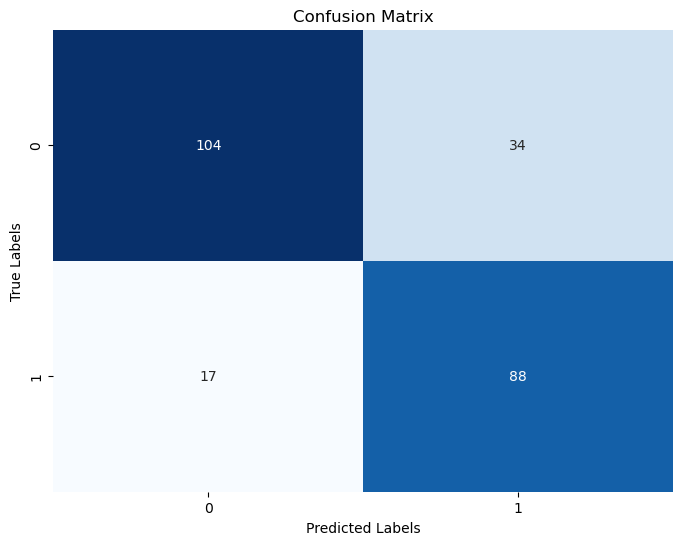

In [11]:
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('xgboost_gridsearch_confusion_matrix.png')
plt.show()

In [12]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [13]:
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.035772477599669686, 'max_depth': 4, 'n_estimators': 181, 'subsample': 0.5313612977892944}
Best score:  0.7936435019496821


In [14]:
rand_model = xgb.XGBClassifier(**random_search.best_params_, random_state=1)
rand_model.fit(X_train, y_train)

pred = rand_model.predict(X_test)

rand_accuracy = accuracy_score(y_test, pred)
print("Random Search Model Accuracy:", rand_accuracy)

Random Search Model Accuracy: 0.7942386831275721


In [15]:
with open('random_search_xgboost_model.pkl', 'wb') as f:
    pickle.dump(rand_model, f)

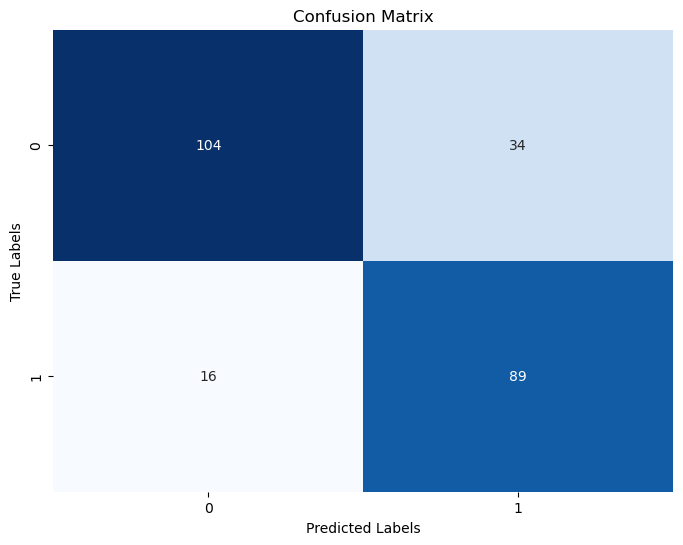

In [16]:
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('xgboost_randomsearch_confusion_matrix.png')
plt.show()